In [107]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import numpy as np
#matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

In [67]:
gender_file_loc = 'Data/gender_submission.csv'
test_file_loc= 'Data/test.csv'
train_file_loc = 'Data/train.csv'

df_gender = pd.DataFrame.from_csv(gender_file_loc, index_col=None)
df_test_set = pd.DataFrame.from_csv(test_file_loc, index_col=None)
df_train_set = pd.DataFrame.from_csv(train_file_loc, index_col=None)

In [58]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [59]:
df_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
def convert_sex(row):
    if row['Sex'] == 'male':
        val = 1
    else:
        val = 0
    return val


df_train_set['sex_binary'] = df_train_set.apply(convert_sex, axis =1)
df_train_set.head()
df_train_set.drop('Sex', axis=1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,0


### VARIABLE DESCRIPTIONS

We've got a sense of our variables, their class type, and the first few observations of each. We know we're working with 1309 observations of 12 variables. To make things a bit more explicit since a couple of the variable names aren't 100% illuminating, here's what we've got to deal with:

Variable Description

    Survived: Survived (1) or died (0)
    Pclass: Passenger's class
    Name: Passenger's name
    Sex: Passenger's sex
    Age: Passenger's age
    SibSp: Number of siblings/spouses aboard
    Parch: Number of parents/children aboard
    Ticket: Ticket number
    Fare: Fare
    Cabin: Cabin
    Embarked: Port of embarkation


In [78]:
df_train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_binary
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [79]:
df_train_set.info()
print('--'*20)
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
sex_binary     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null

The cabin columns in both datasets is missing a lot of information; easiest to deal with it is to drop these from the datasets. The age column is also missing some values, but to a dropping it would perhaps mean leaving out valuable information. Instead, we can impute this. The simplest way to do is to impute it with the mean or modus, so for now this is how I'll do it. (Other ways are to take the mean per sex, or per sex per passenger class for example). 

In [116]:
categorical_features = ['Embarked'] #Sex is ignored as it is already converted to binary for now let's ignore cabin as well
ordinal_features = ['Age', 'Pclass']
numerical_features = ['Parch', 'SibSp', 'Fare']
ignored_features = ['Ticket', 'Cabin', 'Name', 'Sex']
output_feature = ['Survived']
columns_to_plot = categorical_features + ordinal_features + numerical_features + output_feature

# Exploratory analysis

In [81]:
print('PClass')
print(np.unique(df_train_set.Pclass))
print('Survived')
print(np.unique(df_train_set.Survived))
print('Sex')
print(np.unique(df_train_set.Sex))
print('SibSp')
print(np.unique(df_train_set.SibSp))
print('Parch')
print(np.unique(df_train_set.Parch))
print('Cabin')
# print(np.unique(df_train_set.Cabin))

PClass
[1 2 3]
Survived
[0 1]
Sex
['female' 'male']
SibSp
[0 1 2 3 4 5 8]
Parch
[0 1 2 3 4 5 6]
Cabin


In [82]:
def one_hot_encoding(categorical_variables, dataframe):
    """
    Function to convert categorical features to one-hot
    encoded features
    
    :param: categorical_variables list of categorical features
    :param: dataframe the dataframe to one-hot-encode
    :returns: pd.DataFrame()
    """
    return pd.get_dummies(dataframe, columns=categorical_variables, drop_first=True)
    

In [117]:
df_transformed = one_hot_encoding(categorical_features, df_train_set)
df_transformed = df_transformed.drop(ignored_features, axis=1)
df_transformed.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_binary,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Graphs
Passenger Class

Plotting for  Embarked


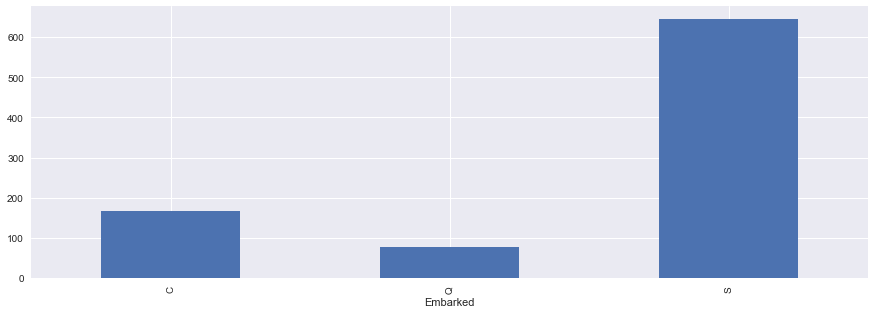

Plotting for  Age


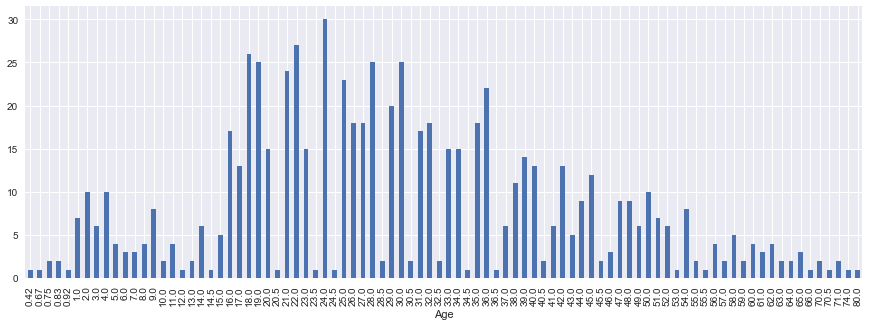

Plotting for  Pclass


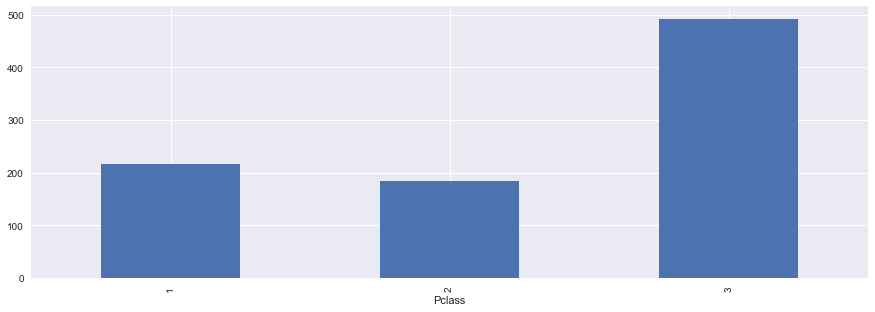

Plotting for  Parch


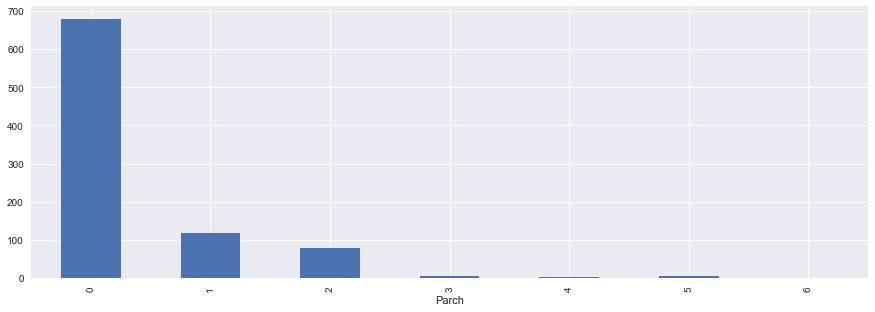

Plotting for  SibSp


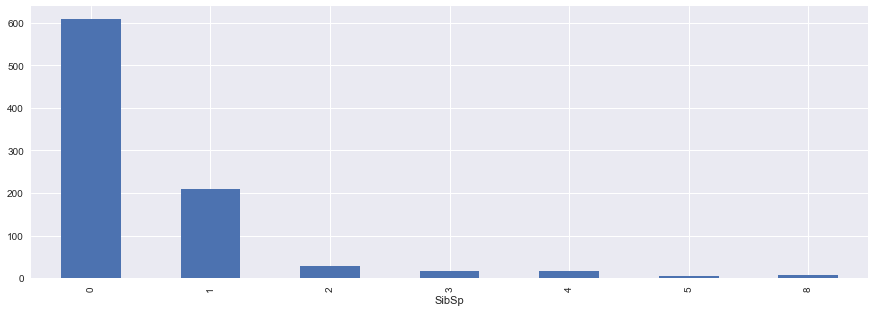

Plotting for  Fare


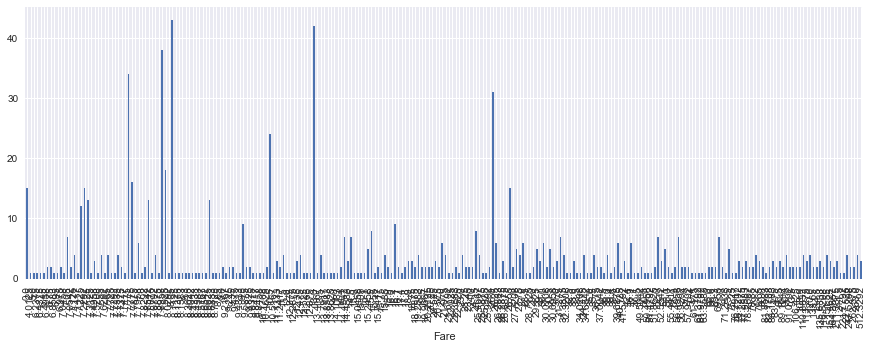

Plotting for  Survived


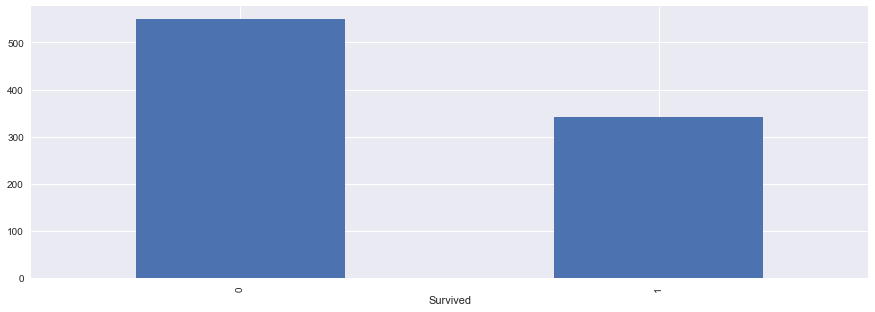

In [114]:
def plot_bar_chart(dataframe, columns):
    for col in columns:
        print("Plotting for " , col)
        fig = dataframe.groupby(col)['PassengerId'].count().plot.bar()
        plt.show()
       
plot_bar_chart(df_train_set, columns_to_plot)

Embarked

In [128]:
df_transformed.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

As a baseline model we take that everyone died. This will give us an accuracy of 549/(342+549) = 0.611 => 61% in the case of the train  set
# Model exploration

In [146]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.preprocessing import Imputer

In [147]:
X = df_transformed.drop(['PassengerId', 'Survived'], axis=1)
y = df_transformed['Survived']

In [148]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [176]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,sex_binary,Embarked_Q,Embarked_S
247,2,24.0,0,2,14.5000,0,0,1
503,3,37.0,0,0,9.5875,0,0,1
172,3,1.0,1,1,11.1333,0,0,1
119,3,2.0,4,2,31.2750,0,0,1
36,3,NaN,0,0,7.2292,1,0,0


In [168]:
estimator = Pipeline([
    ('imputer', Imputer(missing_values = 'NaN', strategy = 'median')),
    ('estimator', LR())
   
])

In [169]:
estimator.fit(X_train, y_train)
predicted = estimator.predict(X_test)
estimator.score(X_test, y_test)

0.78026905829596416

# Predicting test set

In [184]:
df_test_set['sex_binary'] = df_test_set.apply(convert_sex, axis =1)

In [185]:
df_transformed_test = one_hot_encoding(categorical_features, df_test_set)
df_transformed_test = df_transformed_test.drop(ignored_features, axis=1)
df_transformed_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_binary,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [186]:
X_t = df_transformed_test.drop(['PassengerId'], axis=1)

In [187]:
X_t.head()

,Pclass,Age,SibSp,Parch,Fare,sex_binary,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [189]:
pred = pd.Series(estimator.predict(X_t))

In [201]:
def dump_to_csv(series, iteration):
    df = pd.DataFrame()
    df['Survived'] = series
    df['PassengerId'] =  df_test_set['PassengerId']
    path = 'results/' + str(iteration) + '.csv'
    df.to_csv(path, index=False)

In [202]:
dump_to_csv(pred, 1)

# Kaggle Score
First submission
0.76076 